In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/credit card.csv')

In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
fill= df['AGE'].median()

In [ ]:
df.AGE = df.AGE.fillna(fill)

In [ ]:
df.AGE

0        24.0
1        26.0
2        34.0
3        34.0
4        57.0
         ... 
29995    39.0
29996    43.0
29997    37.0
29998    41.0
29999    46.0
Name: AGE, Length: 30000, dtype: float64

In [ ]:
X = df.drop(['default.payment.next.month'],axis=1)

In [ ]:
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,34.0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [ ]:
y= df['default.payment.next.month']

In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [ ]:
import seaborn
from sklearn.svm import SVC
r=SVC(gamma='auto')
r.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
pred2= r.predict(X_test)

In [ ]:
r.score(X_test,y_test)

0.7777777777777778

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
accuracy_score(y_test,pred2)

0.7777777777777778

In [ ]:
confusion_matrix(y_test,pred2)

array([[7000,    0],
       [2000,    0]])

In [ ]:
pred1= r.predict(X_test)

In [ ]:
classification_report(y_test,pred1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.78      1.00      0.88      7000\n           1       0.00      0.00      0.00      2000\n\n    accuracy                           0.78      9000\n   macro avg       0.39      0.50      0.44      9000\nweighted avg       0.60      0.78      0.68      9000\n'

In [ ]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7000
           1       0.00      0.00      0.00      2000

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred=d.predict(X_test)
d.score(X_test,y_test)

0.7231111111111111

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
accuracy_score(y_test,pred)

0.7231111111111111

In [ ]:
confusion_matrix(y_test,pred)

array([[5680, 1320],
       [1172,  828]])

In [ ]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.81      0.82      7000\n           1       0.39      0.41      0.40      2000\n\n    accuracy                           0.72      9000\n   macro avg       0.61      0.61      0.61      9000\nweighted avg       0.73      0.72      0.73      9000\n'

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7000
           1       0.39      0.41      0.40      2000

    accuracy                           0.72      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.72      0.73      9000



In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)
gnb.predict(X_test)

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
gnb.score(X_test,y_test)

0.37744444444444447

In [ ]:
from sklearn.naive_bayes import BernoulliNB


bnb = BernoulliNB()

In [ ]:
bnb.fit(X_train, y_train)


bnb.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
bnb.score(X_test,y_test)

0.771

In [ ]:
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()

In [ ]:
#Train the model using the training sets
#mnb.fit(X_train, y_train)

#Predict the response for test dataset
#mnb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [ ]:
accuracy_score(y_test,pred)

0.7231111111111111

In [ ]:
cnf_matrix=confusion_matrix(y_test,pred)
cnf_matrix

array([[5680, 1320],
       [1172,  828]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7000
           1       0.39      0.41      0.40      2000

    accuracy                           0.72      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.72      0.73      9000



Text(0.5, 427.9555555555555, 'Predicted label')

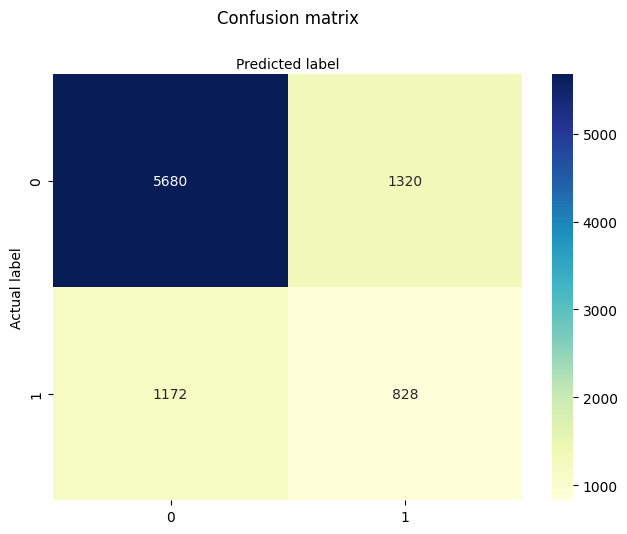

In [ ]:
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

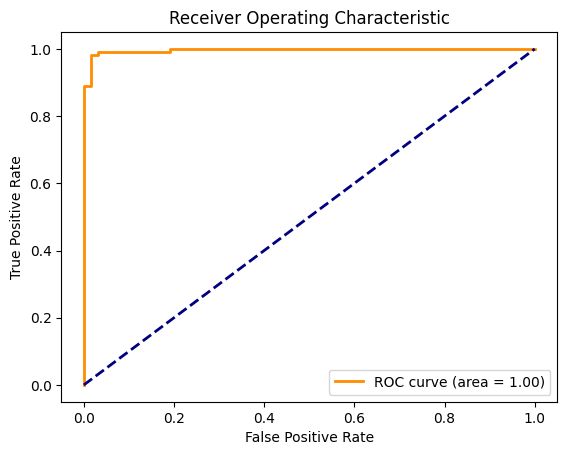

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Load the breast cancer dataset as an example
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Compute decision function values
decision_values = svm.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, decision_values)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()